In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
clustered_data = pd.read_csv("clustered_data.csv")

In [3]:
df_log = pd.get_dummies(clustered_data, drop_first = True, columns = ['Weather Condition'])
df_log

,DATE,Crash Time,Crash Severity,Maximum Injury Severity Reported,Number of Vehicles,Total Nonfatal Injuries,Total Fatal Injuries,Manner of Collision,Vehicle Action Prior to Crash,Vehicle Travel Directions,...,Ice,X,Y,cluster,Quadrant,Weather Condition_Cloudy,Weather Condition_Cloudy/Rain,Weather Condition_Fog,Weather Condition_Rain,Weather Condition_Snow
0,2002-01-01,12:00 PM,Not Reported,Not reported,2,0,0,Rear-end,V1: Turning left / V2: Travelling straight ahead,V1: N / V2: N,...,True,-71.277587,41.948610,0,NE,0,0,0,0,0
1,2002-01-02,4:26 AM,Property damage only (none injured),No injury,2,0,0,Angle,V1: Turning left / V2: Travelling straight ahead,V1: W / V2: E,...,True,-71.296220,41.932683,3,SE,0,0,0,0,0
2,2002-01-02,5:10 AM,Property damage only (none injured),No injury,1,0,0,Angle,V1: Slowing or stopped in traffic,V1: W,...,True,-71.277947,41.948334,0,NE,0,0,0,1,0
3,2002-01-02,7:20 AM,Non-fatal injury,Non-fatal injury - Non-incapacitating,1,1,0,Single vehicle crash,V1: Travelling straight ahead,V1: N,...,True,-71.260316,41.931229,3,SE,0,0,0,0,0
4,2002-01-02,11:10 AM,Not Reported,Not reported,1,0,0,Single vehicle crash,V1: Backing,V1: W,...,True,-71.291080,41.938218,3,SE,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19540,2021-11-30,2:49 PM,Non-fatal injury,Possible Injury (C),3,0,0,Front to Rear,V1: Travelling straight ahead / V2: Slowing or...,V1: W / V2: W / V3: W,...,True,-71.310037,41.933970,3,SE,1,0,0,0,0
19541,2021-11-30,4:01 PM,Non-fatal injury,Suspected Minor Injury (B),2,0,0,"Sideswipe, same direction",V1: Travelling straight ahead / V2: Travelling...,V1: S / V2: S,...,True,-71.304793,41.954814,0,NE,0,0,0,0,0
19542,2021-11-30,11:27 PM,Non-fatal injury,Possible Injury (C),2,0,0,Angle,V1: Backing / V2: Travelling straight ahead,V1: N / V2: N,...,True,-71.299166,41.919310,3,SE,0,0,0,0,0
19543,2022-01-23,9:04 AM,Property damage only (none injured),No Apparent Injury (O),2,0,0,Single vehicle crash,V1: Travelling straight ahead / V2: Parked,V1: E / V2: E,...,True,-71.286086,41.936284,3,SE,0,0,0,0,0


In [4]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [5]:
X = df_log[['Weather Condition_Cloudy', 'Weather Condition_Cloudy/Rain', 'Weather Condition_Fog',
       'Weather Condition_Rain', 'Weather Condition_Snow','SNOW',
       'PRCP', 'TMAX','TMIN', 'Ice']]
y = df_log[['X','Y']]

In [6]:
y = list(zip(y.X,y.Y))

In [7]:
y

[(-71.27758702080472, 41.94861041689777),
 (-71.29622046939141, 41.932682686388766),
 (-71.27794679039998, 41.9483337021698),
 (-71.2603161448396, 41.93122867322644),
 (-71.29107975008647, 41.93821835244071),
 (-71.29240367603926, 41.92264560046506),
 (-71.27152155739493, 41.94313450599529),
 (-71.36314657980284, 41.91035947227228),
 (-71.28694633890613, 41.946259230677285),
 (-71.28742757451654, 41.946664719755496),
 (-71.28073806617297, 41.94586371463139),
 (-71.35895877972666, 41.915683766998406),
 (-71.27397064090624, 41.95076301350714),
 (-71.35802082468474, 41.909980133025925),
 (-71.35514935700667, 41.92698472293342),
 (-71.2848120336025, 41.93623386971152),
 (-71.28286053569717, 41.94471836884005),
 (-71.28636176082843, 41.9429004323398),
 (-71.3170745774382, 41.9372749156705),
 (-71.30988659376426, 41.9439638839436),
 (-71.2967985280806, 41.92117687505367),
 (-71.23822748536398, 42.026193869097895),
 (-71.29531631429695, 41.97324083576015),
 (-71.35520785518989, 41.89972563521

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=654)

In [9]:
# define model
model = LinearRegression()
# fit model
model.fit(x_train, y_train)
# make a prediction
row = [1, 0, 0, 0, 0, 0, 0, 0, -10, 1]
output = model.predict([row])
# summarize prediction
print(output[0])

[-71.31898465  41.92921743]


In [10]:
predictions = model.predict(x_test)
r2_score(y_test, predictions, sample_weight=None, multioutput='variance_weighted')

0.002328072825588561

In [11]:
model.score(x_train, y_train)

0.0036049373889158742

In [12]:
model.coef_

array([[-5.59485978e-03, -3.70360947e-03,  5.41654068e-03,
        -1.97330722e-03,  1.58276122e-03,  5.23744891e-04,
        -3.75732988e-04, -3.85495204e-05,  6.02023312e-05,
         6.79139007e-04],
       [-2.58520998e-03, -1.70293514e-03,  6.47838360e-03,
        -1.09904320e-03, -1.75910573e-03,  1.17060649e-04,
         1.61114172e-04, -6.40891577e-05,  6.43613025e-05,
        -8.92703311e-05]])

In [13]:
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)
coefficients

,0,0,1
0,Weather Condition_Cloudy,-0.005595,-0.002585
1,Weather Condition_Cloudy/Rain,-0.003704,-0.001703
2,Weather Condition_Fog,0.005417,0.006478
3,Weather Condition_Rain,-0.001973,-0.001099
4,Weather Condition_Snow,0.001583,-0.001759
5,SNOW,0.000524,0.000117
6,PRCP,-0.000376,0.000161
7,TMAX,-0.000039,-0.000064
8,TMIN,0.000060,0.000064
9,Ice,0.000679,-0.000089


DECISION TREE

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from re import sub
from decimal import Decimal

In [15]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
# define model
model = DecisionTreeRegressor()
# fit model
model.fit(x_train, y_train)
# make a prediction
row = [0, 0, 0, 0, 0, 0, 0, 10, 10, 1]
yhat = model.predict([row])
# summarize prediction
print(yhat[0])

[-71.35965034  41.91734098]


In [16]:
param_grid = {
    'max_depth': [3, 5, 7],
}

In [17]:
CV_tree = GridSearchCV(estimator=model, param_grid=param_grid, cv= 10)
CV_tree.fit(x_train, y_train)
print(CV_tree.best_params_)

{'max_depth': 3}


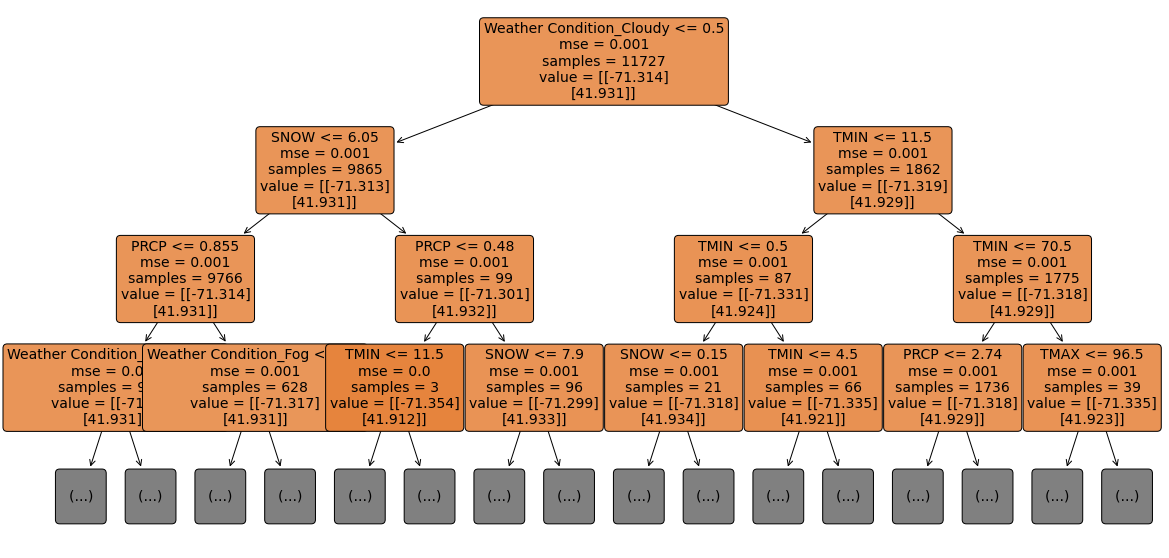

In [18]:
fn = ['Weather Condition_Cloudy', 'Weather Condition_Cloudy/Rain', 'Weather Condition_Fog',
       'Weather Condition_Rain', 'Weather Condition_Snow','SNOW',
       'PRCP', 'TMAX','TMIN', 'Ice']
plt.figure(figsize=(20,10))
a = plot_tree(model, 
              feature_names=fn,
              max_depth=3,
              filled=True, 
              rounded=True, 
              fontsize=14)